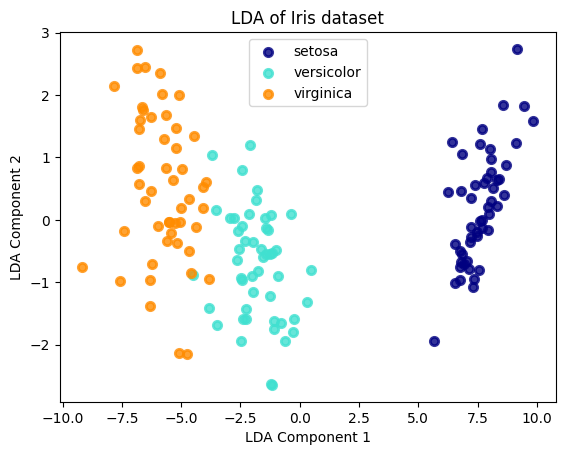

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the results
target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Iris dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()


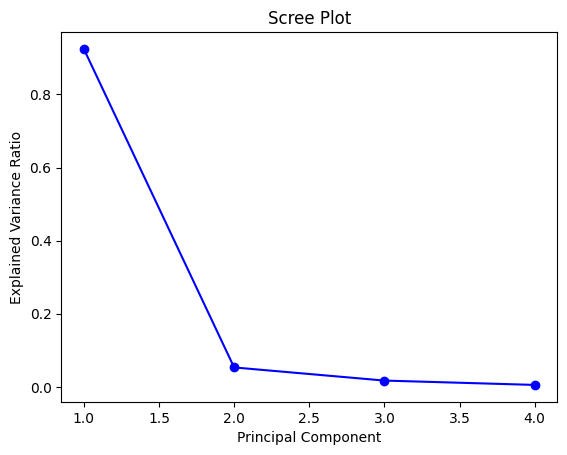

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create the scree plot
num_components = len(explained_variance_ratio)
plt.plot(np.arange(1, num_components + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


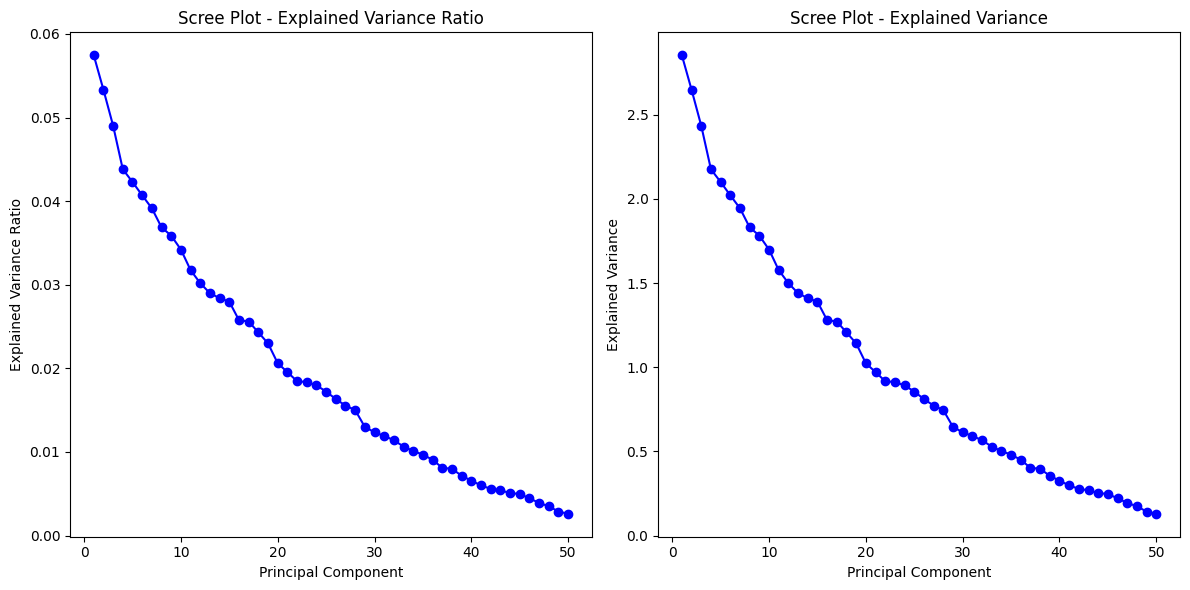

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate a synthetic high-dimensional dataset
np.random.seed(42)
num_samples = 100
num_features = 50
X = np.random.randn(num_samples, num_features)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the explained variance ratio and variance
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pca.explained_variance_

# Create the scree plot for explained variance ratio
num_components = len(explained_variance_ratio)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, num_components + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance Ratio')

# Create the scree plot for actual variance
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, num_components + 1), explained_variance, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot - Explained Variance')

plt.tight_layout()
plt.show()



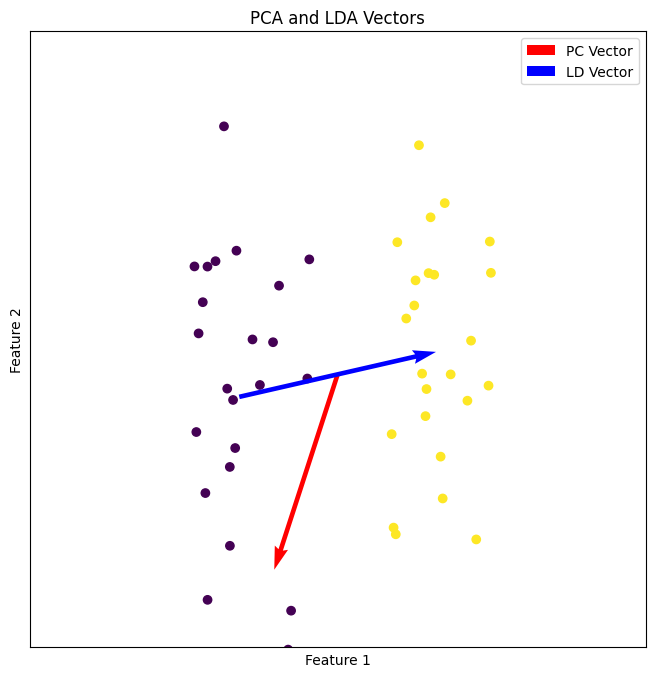

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate random data
np.random.seed(2)
size=24
mean1 = [3.5, 3]
cov1 = [[0.1, 0], [0, 2]]
X1 = np.random.multivariate_normal(mean1, cov1, size)

# Generate random data for yellow group with restricted x and y ranges
x_yellow = np.random.uniform(5.0, 6.0, size=(size,))
y_yellow = np.random.uniform(1.0, 5.0, size=(size,))
X_yellow = np.column_stack((x_yellow, y_yellow))

X = np.concatenate((X1, X_yellow))
y = np.concatenate((np.zeros(size), np.ones(size)))  # Class labels (0 and 1)

# Perform PCA
pca = PCA(n_components=2)
pca_projection = pca.fit_transform(X)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda_projection = lda.fit_transform(X, y)

# Set aspect ratio to 'equal' for square plot
plt.figure(figsize=(8, 8))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Plot PCA vector
plt.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1],
           scale=3, color='red', label='PC Vector')

# Plot LDA vector
class0_mean = np.mean(X[y == 0], axis=0)
class1_mean = np.mean(X[y == 1], axis=0)
ld_vector = class1_mean - class0_mean
plt.quiver(class0_mean[0], class0_mean[1], ld_vector[0], ld_vector[1],
           scale=6, color='blue', label='LD Vector')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA and LDA Vectors')
plt.legend()
plt.xlim(1.5,7.5)
plt.ylim(0,6)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks([])
plt.yticks([])
plt.show()
